[原文链接](https://preettheman.medium.com/how-to-predict-doge-coin-price-using-machine-learning-and-python-4bc7d723a6d3?source=search_post---------2)




* 需要安装的包

```
pip install yfinance
pip install yahoofinancials
pip install sklearn
pip install matplotlib
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

In [2]:
df = yf.download('DOGE-USD',start='2021-01-01',end='2021-04-01',progress=False)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,0.004636,0.004743,0.004553,0.004682,0.004682,85498337
2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,228961515
2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3421562680
2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2707003608
2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1372398979


In [32]:
series = df['Close'].values.reshape(-1, 1)
print(series)

[[0.004682]
 [0.005685]
 [0.010615]
 [0.009771]
 [0.009767]
 [0.00992 ]
 [0.010465]
 [0.009742]
 [0.009846]
 [0.010194]
 [0.00986 ]
 [0.008835]
 [0.008063]
 [0.008616]
 [0.009397]
 [0.009369]
 [0.009265]
 [0.009067]
 [0.009171]
 [0.009098]
 [0.00906 ]
 [0.008166]
 [0.008524]
 [0.008579]
 [0.008727]
 [0.008383]
 [0.008255]
 [0.007482]
 [0.012555]
 [0.047162]
 [0.028176]
 [0.037196]
 [0.034875]
 [0.03152 ]
 [0.03712 ]
 [0.053289]
 [0.046935]
 [0.057595]
 [0.078782]
 [0.078825]
 [0.07007 ]
 [0.072896]
 [0.069676]
 [0.070069]
 [0.06645 ]
 [0.062537]
 [0.056591]
 [0.05352 ]
 [0.049376]
 [0.059541]
 [0.055139]
 [0.054384]
 [0.05598 ]
 [0.053725]
 [0.047392]
 [0.056555]
 [0.050167]
 [0.05048 ]
 [0.050083]
 [0.048052]
 [0.050599]
 [0.050262]
 [0.050592]
 [0.050048]
 [0.049609]
 [0.050984]
 [0.052122]
 [0.061949]
 [0.057998]
 [0.056004]
 [0.055918]
 [0.055349]
 [0.062432]
 [0.058592]
 [0.057088]
 [0.058607]
 [0.057653]
 [0.057383]
 [0.058328]
 [0.058961]
 [0.057234]
 [0.054962]
 [0.053556]
 [0.

In [33]:
#实例化
scaler = StandardScaler()
# fit，本质是生成均值和方差
scaler.fit(series[:len(series) // 2])
# 
series = scaler.transform(series).flatten()

In [34]:
print(series)

[-0.85085148 -0.80960673 -0.60687838 -0.64158482 -0.6417493  -0.63545771
 -0.61304658 -0.64277732 -0.6385007  -0.62419047 -0.63792502 -0.68007441
 -0.71182012 -0.68907997 -0.65696419 -0.6581156  -0.66239222 -0.67053425
 -0.66625764 -0.66925949 -0.6708221  -0.7075846  -0.69286317 -0.69060148
 -0.68451551 -0.69866126 -0.7039248  -0.73571162 -0.52710288  0.89598448
  0.11525409  0.48616883  0.39072623  0.25276401  0.48304362  1.14793512
  0.8866499   1.32500375  2.19624229  2.19801039  1.83799283  1.95420205
  1.82179095  1.83795178  1.68913352  1.52822557  1.28371792  1.15743422
  0.98702718  1.40502588  1.22400973  1.19296306  1.25859277  1.16586406
  0.90544237  1.2822375   1.01955427  1.03242522  1.01610001  0.93258257
  1.03731869  1.02346075  1.03703085  1.0146608   0.99660854  1.05315032
  1.09994651  1.50404621  1.34157574  1.25957961  1.25604324  1.23264515
  1.52390778  1.36600173  1.30415518  1.36661863  1.32738875  1.31628606
  1.35514569  1.38117557  1.31015896  1.21673126  1

In [35]:
T = 10
D = 1
X = []
Y = []

In [36]:
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [37]:
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (81, 10) Y.shape (81,)


In [38]:
class BaselineModel:
    def predict(self, X):
        return X[:,-1] # return the last value for each input sequence

In [39]:
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [40]:
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [41]:
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [42]:
# right forecast
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
    f = model.predict(input_.reshape(1, T))[0]
    forecast.append(f)
    # make a new input with the latest forecast
    input_ = np.roll(input_, -1)
    input_[-1] = f

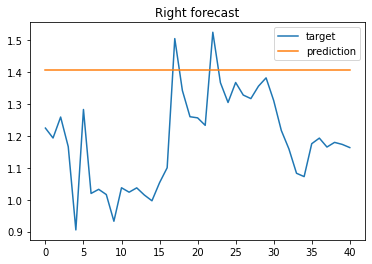

In [45]:
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.title("Right forecast")
plt.legend()
plt.show()

In [46]:
forecast

[1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732,
 1.4050258792597732]